### This script contains the following:
1. Importing Libraries
2. Importing Data
3. Line plot of the temperatures for 2022 - Time series
4. Trips per day
5. line chart of bike trip counts and temperatures - Dual axis
6. Insights

## 1. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from datetime import datetime as dt
import os

## 2. Importing Data

In [7]:
# Define the folder path
folderpath = "../Citibike_Project/Data/Prepared_data"

# Load the DataFrame from the pickle file
df = pd.read_pickle(os.path.join(folderpath, 'cleaned_nyc_bike_weather_data.pkl'))

In [9]:
# Check the shape
df.shape

(29838166, 21)

In [19]:
# Set the date to datetime
df['date'] = pd.to_datetime(df['date'])
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])


In [13]:
# Check the data types
df.dtypes

ride_id                       object
rideable_type               category
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name          category
start_station_id            category
end_station_name            category
end_station_id              category
start_lat                    float32
start_lng                    float32
end_lat                      float32
end_lng                      float32
member_casual                 object
date                  datetime64[ns]
avgTemp                      float32
trip_duration                  int64
month                          int64
season                        object
value                          int64
bike_rides_daily               int64
log_trip_duration            float64
dtype: object

## 3. Line plot of the temperatures for 2022 - Time series

In [21]:
# Subset the data 
df_temp = df[['date', 'avgTemp']]

In [23]:
# Reduce data to only include one datapoint per day
df_temp_grouped = df_temp.groupby(['date']).mean().reset_index()

In [25]:
df_temp_grouped = df_temp_grouped.set_index('date')

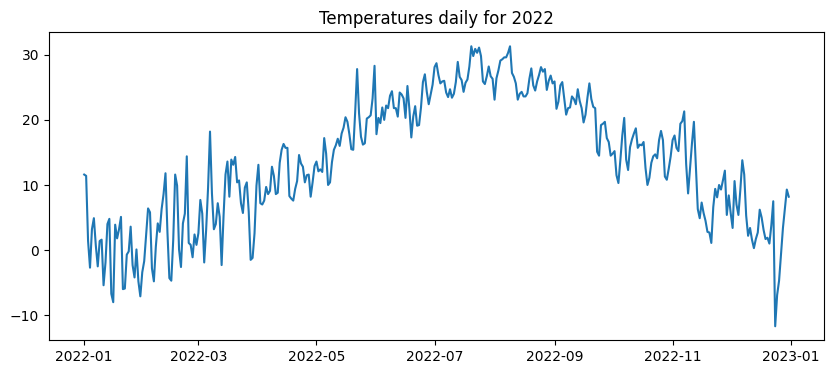

In [27]:
# Plot the time series
plt.figure(figsize=(10, 4))  # Create the figure
plt.title('Temperatures daily for 2022')  # Set title
plt.plot(df_temp_grouped['avgTemp'])  # Define the plot

# Save the figure
plt.savefig('Visualizations/temperatures_daily_2022.png', dpi=300, bbox_inches='tight')  # Save as a high-quality PNG file

# Display the plot
plt.show()

## 4. Trips per day

In [30]:
# Calculate the daily number of bike rides using groupby
df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)

In [38]:
df_group.head(2)

,date,bike_rides_daily
0,2022-01-01,20428
1,2022-01-02,43009


In [40]:
df_group.tail(2)

,date,bike_rides_daily
363,2022-12-30,62298
364,2022-12-31,31466


In [36]:
# Outer merge of df_temp_grouped and df_group on the 'date' column
df_merged = df_temp_grouped.merge(df_group, on="date", how="outer", indicator=True)

# Check counts of merge results
print(df_merged['_merge'].value_counts(dropna=False))

# Check the shape of December 30th and 31st in the original DataFrame (df)
print("Shape of December 30th is", df[df['date'] == '2022-12-30'].shape)  # Check
print("Shape of December 31st is", df[df['date'] == '2022-12-31'].shape)  # Second check
# Check the shape of January 1st and 2nd in the original DataFrame (df)
print("Shape of January 1st is", df[df['date'] == '2022-01-01'].shape)  # Check
print("Shape of January 2nd is", df[df['date'] == '2022-01-02'].shape)  # Second check
# Set 'date' as the index in the merged DataFrame
df_merged = df_merged.set_index('date')


both          365
left_only       0
right_only      0
Name: _merge, dtype: int64
Shape of December 30th is (62298, 21)
Shape of December 31st is (31466, 21)
Shape of January 1st is (20428, 21)
Shape of January 2nd is (43009, 21)


In [42]:
df_merged

,avgTemp,bike_rides_daily,_merge
date,,,
2022-01-01,11.6,20428,both
2022-01-02,11.4,43009,both
2022-01-03,1.4,33189,both
2022-01-04,-2.7,36842,both
2022-01-05,3.2,34230,both
...,...,...,...
2022-12-27,-0.7,33044,both
2022-12-28,3.4,44027,both
2022-12-29,6.4,51674,both


## 5. line chart of bike trip counts and temperatures - Dual axis

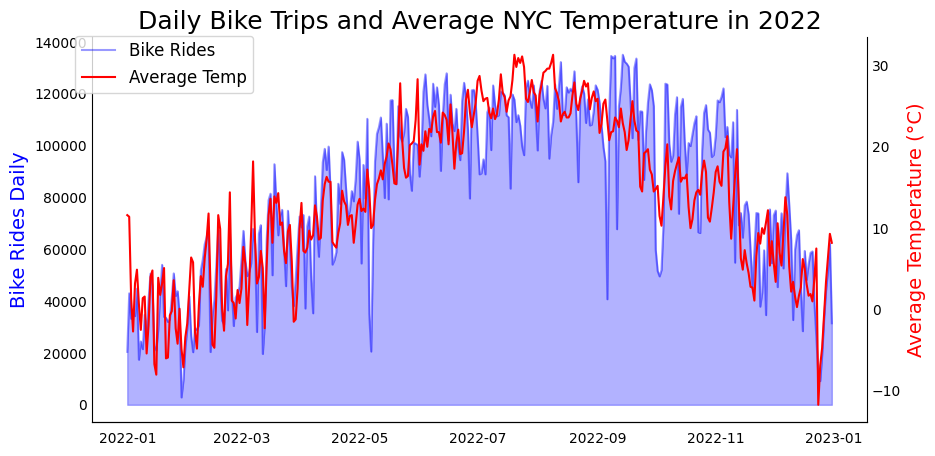

In [47]:
# Create figure and axis objects with subplots
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the daily bike rides (left y-axis)
ax.plot(df_merged['bike_rides_daily'], color='blue', alpha=0.4, label='Bike Rides')
ax.fill_between(df_merged.index, df_merged['bike_rides_daily'], color='blue', alpha=0.3)

# Left y-axis label and styling
ax.set_ylabel('Bike Rides Daily', color='blue', fontsize=14)
ax.spines[['right', 'top']].set_visible(False)  # Remove unnecessary spines
ax.tick_params(axis='y', which='both', length=0)  # Remove tick marks
ax.xaxis.set_ticks_position('none')  # Remove x-axis ticks for a cleaner look

# Create a twin axis object for the right y-axis
ax2 = ax.twinx()

# Plot the average temperatures (right y-axis)
ax2.plot(df_merged['avgTemp'], color='red', label='Average Temp')

# Right y-axis label and styling
ax2.set_ylabel('Average Temperature (°C)', color='red', fontsize=14)
ax2.spines[['left', 'top']].set_visible(False)  # Remove unnecessary spines
ax2.tick_params(axis='y', which='both', length=0)  # Remove tick marks

# Add title
plt.title('Daily Bike Trips and Average NYC Temperature in 2022', fontsize=18)

# Add legend to describe the lines
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9), fontsize=12)

# Save the figure to a file
plt.savefig('Visualizations/daily_bike_trips_vs_temperature_2022.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

I used Matplotlib's Object-Oriented API, allowing granular control over each component of the plot. This paradigm enables to customize and manage multiple subplots, dual axes, and other complex visualizations effectively. I built two plots; the blue: visualized the number of daily bike trips, and the red: visualizaed the average temperature.
We filled in the area underneath the line for daily bike trips to visually differentiate the two plots. This enhancement highlights the bike ride data more effectively, especially since there is a correlation between the two variables, and the lines often appear similar.

## 6. Insights:

### Insights from the Visualization: Daily Bike Trips and Average Temperature in NYC (2022)

The visualization provides a compelling view of the relationship between daily bike trips and average temperature in NYC for 2022. 

---

#### 1. Temperature's Influence on Bike Rides
There’s a clear correlation between average temperature and the number of bike trips:
- **Spring and Summer (March–August)**: As temperatures rise, bike ridership peaks, likely driven by favorable weather.
- **Winter (December–February)**: Bike trips drop significantly, corresponding to colder weather.

This indicates that warmer weather positively influences biking activity, likely due to better conditions and increased comfort.

---

#### 2. Seasonal Patterns
- **Peak Ridership**: The highest ridership levels occur during late spring and summer, with a sharp increase starting in March and continuing through July.
- **Drop in Fall**: As temperatures decrease after August, ridership begins to decline, showing a lagged response to falling temperatures.
- **Sharp Decline in December**: The end of the year sees a significant dip in bike trips, matching the colder temperatures.
---
#### 3. Actionable Insights for Stakeholders
- **Bike Operators**: Focus marketing and service improvements during spring and summer months when demand is highest.
- **City Planners**: Provide resources such as bike lane maintenance or seasonal bike stations during peak months to accommodate the surge in usage.
- **Sustainability Goals**: Consider promotions or incentives for biking during fall and early winter to reduce dependency on cars even in cooler months.